# Babak Semifinal STC LOGIKA UI 2023

Nomor peserta: 22-3-080-5

## 1. Business Understanding

Yobank sebagai perusahaan bank digital yang ingin meluncurkan produk barunya yaitu pinjaman (credit loan) membutuhkan model untuk menentukan credit scoring customer sebagai prediktor kemampuan customer untuk membayar pinjamannya.

## 2. Data Understanding

In [1]:
# load library pengolahan data
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# load data
app = pd.read_csv('application_record.csv')
cre = pd.read_csv('credit_record.csv')

display(app, cre)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0              427500.00               Working               Higher education   
1              427500.00               Working               Higher education   
2              112500.00               Working  Secondary / secondary special   
3              270000.00  Commercial associate  Secondary / secondary special   
4              270000.00  Commercial associate  Secondary / secondary special   
...                  ...                   ...                            ...   
438552         135000.00             Pensioner  Secondary / secondary special   
438553         103500.00               Working  Secondary / secondary special   
438554          54000.00  Commercial associate               Higher education   
438555          72000.00             Pensioner  Secondary / secondary special   
438556         121500.00               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage   Rented apartment      -12005          -4542   
1             Civil marriage   Rented apartment      -12005          -4542   
2                    Married  House / apartment      -21474          -1134   
3       Single / not married  House / apartment      -19110          -3051   
4       Single / not married  House / apartment      -19110          -3051   
...                      ...                ...         ...            ...   
438552             Separated  House / apartment      -22717         365243   
438553  Single / not married  House / apartment      -15939          -3007   
438554  Single / not married       With parents       -8169           -372   
438555               Married  House / apartment      -21673         365243   
438556               Married  House / apartment      -18858          -1201   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0             NaN   
1                1                1           0           0             NaN   
2                1                0           0           0  Security staff   
3                1                0           1           1     Sales staff   
4                1                0           1           1     Sales staff   
...            ...              ...         ...         ...             ...   
438552           1                0           0           0             NaN   
438553           1                0           0           0        Laborers   
438554           1                1           0           0     Sales staff   
438555           1                0           0           0             NaN   
438556           1                0           1           0     Sales staff   

        CNT_FAM_MEMBERS  
0                  2.00  
1                  2.00  
2                  2.00  
3                  1.00  
4                  1.00  
...                 ...  
438552             1.00  
438553             1.00  
438554             1.00  
43855

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]

In [101]:
# load library eksplorasi data
from pandas_profiling import ProfileReport

In [102]:
# inspeksi app
report_app = ProfileReport(app)
display(report_app)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [103]:
# inspeksi cre
report_cre = ProfileReport(cre)
display(report_cre)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 3. Data Preparation

### Data Selection

In [6]:
# korelasi CNT_CHILDREN dan CNT_FAM_MEMBERS
app[['CNT_CHILDREN', 'CNT_FAM_MEMBERS']].corr()

CNT_CHILDREN  CNT_FAM_MEMBERS
CNT_CHILDREN             1.00             0.88
CNT_FAM_MEMBERS          0.88             1.00

In [7]:
# korelasi tinggi (0.88)

# menghapus atribut CNT_CHILDREN, redundansi dengan CNT_FAM_MEMBERS
# menghapus atribut FLAG_MOBIL, konstan
app = app.loc[:, ~app.columns.isin(['CNT_CHILDREN', 'FLAG_MOBIL'])]
app

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  AMT_INCOME_TOTAL  \
0       5008804           M            Y               Y         427500.00   
1       5008805           M            Y               Y         427500.00   
2       5008806           M            Y               Y         112500.00   
3       5008808           F            N               Y         270000.00   
4       5008809           F            N               Y         270000.00   
...         ...         ...          ...             ...               ...   
438552  6840104           M            N               Y         135000.00   
438553  6840222           F            N               N         103500.00   
438554  6841878           F            N               N          54000.00   
438555  6842765           F            N               Y          72000.00   
438556  6842885           F            N               Y         121500.00   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                    Working               Higher education   
1                    Working               Higher education   
2                    Working  Secondary / secondary special   
3       Commercial associate  Secondary / secondary special   
4       Commercial associate  Secondary / secondary special   
...                      ...                            ...   
438552             Pensioner  Secondary / secondary special   
438553               Working  Secondary / secondary special   
438554  Commercial associate               Higher education   
438555             Pensioner  Secondary / secondary special   
438556               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage   Rented apartment      -12005          -4542   
1             Civil marriage   Rented apartment      -12005          -4542   
2                    Married  House / apartment      -21474          -1134   
3       Single / not married  House / apartment      -19110          -3051   
4       Single / not married  House / apartment      -19110          -3051   
...                      ...                ...         ...            ...   
438552             Separated  House / apartment      -22717         365243   
438553  Single / not married  House / apartment      -15939          -3007   
438554  Single / not married       With parents       -8169           -372   
438555               Married  House / apartment      -21673         365243   
438556               Married  House / apartment      -18858          -1201   

        FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                     1           0           0             NaN   
1                     1           0           0             NaN   
2                     0           0           0  Security staff   
3                     0           1           1     Sales staff   
4                     0           1           1     Sales staff   
...                 ...         ...         ...             ...   
438552                0           0           0             NaN   
438553                0           0           0        Laborers   
438554                1           0           0     Sales staff   
438555                0           0           0             NaN   
438556                0           1           0     Sales staff   

        CNT_FAM_MEMBERS  
0                  2.00  
1                  2.00  
2                  2.00  
3                  1.00  
4                  1.00  
...                 ...  
438552             1.00  
438553             1.00  
438554             1.00  
438555             2.00  
438556             2.00  

[438557 rows x 16 columns]

In [8]:
# observasi atribut ID
app.ID.value_counts().sort_values(ascending=False)

7137299    2
7836971    2
7636756    2
7636389    2
7213374    2
          ..
6837493    1
6837707    1
6837905    1
6837906    1
6842885    1
Name: ID, Length: 438510, dtype: int64

In [9]:
# terdapat beberapa ID dengan dua record
# inspeksi record dengan ID ganda

count_id = app.ID.value_counts()
dupe_id = count_id[count_id>1].index
app.loc[app.ID.isin(dupe_id),:].sort_values(by = 'ID')

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  AMT_INCOME_TOTAL  \
426818  7022197           M            Y               Y         135000.00   
425023  7022197           F            N               Y         450000.00   
431545  7022327           F            N               Y         135000.00   
431911  7022327           M            Y               Y         256500.00   
425486  7023108           M            Y               Y          67500.00   
...         ...         ...          ...             ...               ...   
426563  7836711           F            N               Y         292500.00   
421464  7836971           M            Y               N         157500.00   
428620  7836971           F            N               Y         103500.00   
422068  7838075           M            N               Y         337500.00   
423702  7838075           F            Y               Y         315000.00   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
426818               Working  Secondary / secondary special   
425023  Commercial associate               Higher education   
431545  Commercial associate  Secondary / secondary special   
431911  Commercial associate               Higher education   
425486               Working  Secondary / secondary special   
...                      ...                            ...   
426563               Working               Higher education   
421464               Working  Secondary / secondary special   
428620               Working  Secondary / secondary special   
422068  Commercial associate  Secondary / secondary special   
423702  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
426818               Married  House / apartment      -11945           -735   
425023             Separated  House / apartment      -19813          -1799   
431545  Single / not married  House / apartment      -14771          -5298   
431911               Married  House / apartment      -21503          -1674   
425486               Married  House / apartment      -15156          -1696   
...                      ...                ...         ...            ...   
426563               Married  House / apartment      -13747          -4386   
421464               Married  House / apartment      -13771          -5520   
428620        Civil marriage  House / apartment      -13383          -2798   
422068               Married  House / apartment      -18198          -1275   
423702  Single / not married  House / apartment      -10698          -1659   

        FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL        OCCUPATION_TYPE  \
426818                0           0           1               Laborers   
425023                0           0           1                    NaN   
431545                0           0           0  High skill tech staff   
431911                0           0           1             Core staff   
425486                1           0           0             Core staff   
...                 ...         ...         ...                    ...   
426563                0           1           0            Accountants   
421464                0           0           0                    NaN   
428620                0           1           0            Sales staff   
422068                0           0           1                Drivers   
423702                0           0           1                    NaN   

        CNT_FAM_MEMBERS  
426818             5.00  
425023             1.00  
431545             1.00  
431911             2.00  
425486             3.00  
...                 ...  
426563             4.00  
421464             3.00  
428620             2.00  
422068             2.00  
423702             1.00  

[94 rows x 16 columns]

In [10]:
# terlihat bahwa record yang tercatat pada ID yang sama merupakan record yang berbeda
# hipotesis : hal ini merupakan koreksi operator database terhadap record yang sebelumnya ada
# keputusan: akan diambil record terakhir untuk index yang sama

app = app.drop_duplicates(subset = 'ID', keep = 'last')

### Data Transformation

In [11]:
# load library visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

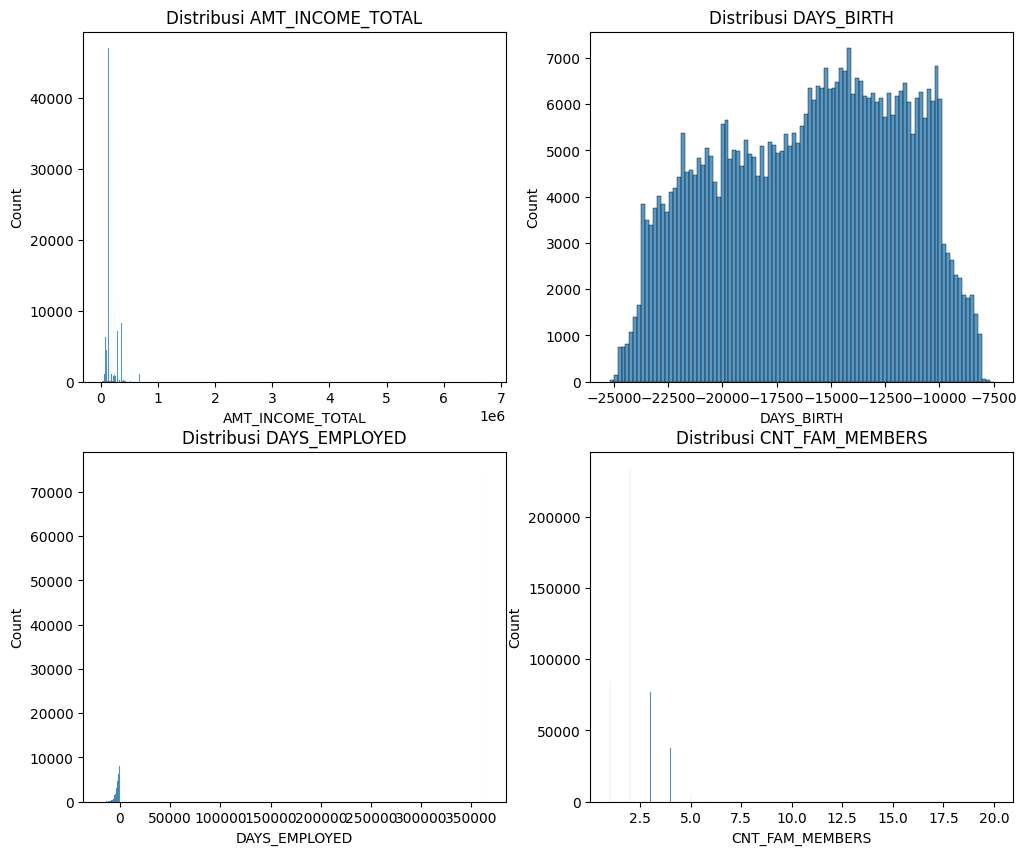

In [50]:
# inspeksi distribusi atribut integer/float
num = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']

fix,ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,10))
for i,col in enumerate(num):
    axis = ax[i//2, i%2]
    sns.histplot(app[col], ax = axis)
    axis.set_title(f'Distribusi {col}')
plt.show()

In [12]:
# observasi atribut AMT_INCOME_TOTAL
# distribusi skew kanan

from scipy.stats import skew
skew(app.AMT_INCOME_TOTAL)

8.835742478642091

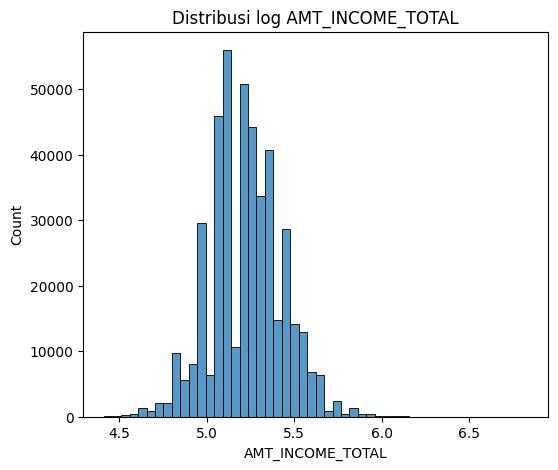

In [13]:
# percobaan transformasi log untuk mengatasi skew
fig,ax = plt.subplots(figsize = (6,5))
sns.histplot(np.log10(app.AMT_INCOME_TOTAL), bins = 50, ax = ax)
ax.set_title('Distribusi log AMT_INCOME_TOTAL')
plt.show()

In [14]:
skew(np.log10(app.AMT_INCOME_TOTAL))

0.15576372717461312

In [15]:
# distribusi log AMT_INCOME_TOTAL memiliki skew yang lebih kecil,
# keputusan: akan dilakukan transformasi log pada AMT_INCOME_TOTAL

app.AMT_INCOME_TOTAL = np.log10(app.AMT_INCOME_TOTAL)
app = app.rename(columns = {'AMT_INCOME_TOTAL': 'AMT_INCOME_TOTAL_L'})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8568\665217370.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.AMT_INCOME_TOTAL = np.log10(app.AMT_INCOME_TOTAL)


In [21]:
# observasi atribut DAYS_BIRTH
# distribusi terlihat hampir normal, atau bimodal normal

In [18]:
# observasi atribut DAYS_EMPLOYED
# distribusi mayoritas berada di domain negatif

# melihat nilai DAYS_EMPLOYED
emp = app.DAYS_EMPLOYED
emp.value_counts(normalize = True).sort_index(ascending = False)

 365243   0.17
-12       0.00
-13       0.00
-16       0.00
-17       0.00
          ... 
-16343    0.00
-16365    0.00
-16495    0.00
-16767    0.00
-17531    0.00
Name: DAYS_EMPLOYED, Length: 9406, dtype: float64

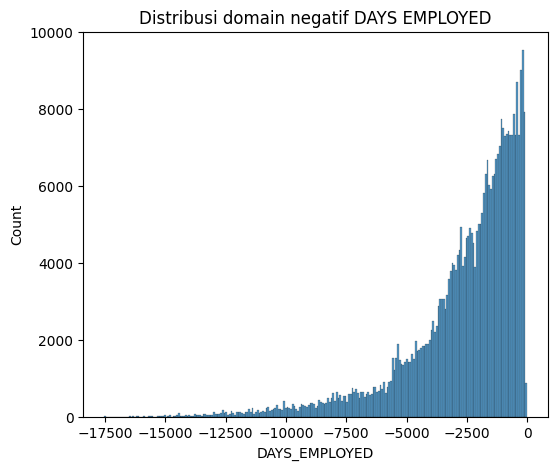

In [19]:
# satu-satunya nilai positif adalah 365243 dengan proporsi 17%, dan nilai lainnya negatif
# observasi distribusi nilai negatif DAYS_EMPLOYED

fig,ax = plt.subplots(figsize = (6,5))
sns.histplot(emp[emp<0], ax = ax)
ax.set_title('Distribusi domain negatif DAYS EMPLOYED')
plt.show()

In [55]:
# distribusi DAYS_EMPLOYED merupakan distribusi skew kiri
skew(emp[emp<0])

-1.7519110476535262

In [54]:
# kesimpulan: distribusi DAYS_EMPLOYED menyerupai campuran diskrit dan kontinu
# hipotesis: nilai DAYS_EMPLOYED positif merupakan indikator customer yang tidak bekerja (unemployed)
# keputusan: akan dilakukan binning untuk bagian kontinu

In [23]:
# bin menggunakan persentil dengan interval 17%, frekuensi dari nilai positif
freq_pos = emp.value_counts(normalize =True)[365243]
1/freq_pos

5.82203693623123

In [24]:
# akan digunakan 6 bin
binn = np.linspace(0,1-freq_pos, 6)

days_bin = np.zeros_like(emp)
for i,num in enumerate(binn):
    if i>0:
        quant = np.quantile(emp,num)
        print(quant)
        days_bin += np.where(emp<quant, np.ones_like(emp), np.zeros_like(emp))

pd.DataFrame({'bin': days_bin, 'ori': emp})

-4022.0
-2491.0
-1485.8969432851882
-733.0
62724.63394057017


bin     ori
0         5   -4542
1         5   -4542
2         2   -1134
3         4   -3051
4         4   -3051
...     ...     ...
438552    0  365243
438553    4   -3007
438554    1    -372
438555    0  365243
438556    2   -1201

[438510 rows x 2 columns]

In [51]:
# nilai bin:
# 0: DAYS_EMPLOYED==365,243, tidak bekerja
# 1: DAYS_EMPLOYED dari 0 sampai -773, lama bekerja 0-2 tahun
# 2: DAYS_EMPLOYED dari -773 sampai -1485, lama bekerja 2-4 tahun
# 3: DAYS_EMPLOYED dari -1485 sampai -2491, lama bekerja 4-7 tahun
# 4: DAYS_EMPLOYED dari -2491 sampai -4022, lama bekerha 7-11 tahun
# 5: DAYS_EMPLOYED kurang dari -4022, lama bekerja 11 tahun atau lebih

In [25]:
app.DAYS_EMPLOYED = days_bin

In [26]:
# observasi distribusi CNT_FAM_MEMBERS
app.CNT_FAM_MEMBERS.value_counts(normalize =True).sort_index().reset_index()

index  CNT_FAM_MEMBERS
0    1.00             0.19
1    2.00             0.53
2    3.00             0.18
3    4.00             0.09
4    5.00             0.01
5    6.00             0.00
6    7.00             0.00
7    8.00             0.00
8    9.00             0.00
9   11.00             0.00
10  14.00             0.00
11  15.00             0.00
12  20.00             0.00

In [27]:
# nilai CNT_FAM_MEMBERS 5 atau lebih merepresentasikan sekitar 1% records
# keputusan: nilai CNT_FAM_MEMBERS 5 atau lebih akan dikelompokan ke dalam satu bin

app.CNT_FAM_MEMBERS =  np.where(app.CNT_FAM_MEMBERS >= 5, 
                                np.full_like(app.CNT_FAM_MEMBERS, 5), 
                                app.CNT_FAM_MEMBERS)

### Data Cleaning

#### Imputation

In [28]:
# melihat jumlah record nan pada app
app.isna().mean().reset_index()

index    0
0                    ID 0.00
1           CODE_GENDER 0.00
2          FLAG_OWN_CAR 0.00
3       FLAG_OWN_REALTY 0.00
4    AMT_INCOME_TOTAL_L 0.00
5      NAME_INCOME_TYPE 0.00
6   NAME_EDUCATION_TYPE 0.00
7    NAME_FAMILY_STATUS 0.00
8     NAME_HOUSING_TYPE 0.00
9            DAYS_BIRTH 0.00
10        DAYS_EMPLOYED 0.00
11      FLAG_WORK_PHONE 0.00
12           FLAG_PHONE 0.00
13           FLAG_EMAIL 0.00
14      OCCUPATION_TYPE 0.31
15      CNT_FAM_MEMBERS 0.00

In [29]:
# sebanyak 30,6% record tidak memiliki OCCUPATION_TYPE
# keputusan: imputasi dengan na (tidak tersedia)
# alasan: ada kemungkinan customer yang tidak memberikan informasi jenis pekerjaan tidak memiliki pekerjaan yang stabil

app = app.fillna({'OCCUPATION_TYPE': 'na'})
app

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  AMT_INCOME_TOTAL_L  \
0       5008804           M            Y               Y                5.63   
1       5008805           M            Y               Y                5.63   
2       5008806           M            Y               Y                5.05   
3       5008808           F            N               Y                5.43   
4       5008809           F            N               Y                5.43   
...         ...         ...          ...             ...                 ...   
438552  6840104           M            N               Y                5.13   
438553  6840222           F            N               N                5.01   
438554  6841878           F            N               N                4.73   
438555  6842765           F            N               Y                4.86   
438556  6842885           F            N               Y                5.08   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                    Working               Higher education   
1                    Working               Higher education   
2                    Working  Secondary / secondary special   
3       Commercial associate  Secondary / secondary special   
4       Commercial associate  Secondary / secondary special   
...                      ...                            ...   
438552             Pensioner  Secondary / secondary special   
438553               Working  Secondary / secondary special   
438554  Commercial associate               Higher education   
438555             Pensioner  Secondary / secondary special   
438556               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage   Rented apartment      -12005              5   
1             Civil marriage   Rented apartment      -12005              5   
2                    Married  House / apartment      -21474              2   
3       Single / not married  House / apartment      -19110              4   
4       Single / not married  House / apartment      -19110              4   
...                      ...                ...         ...            ...   
438552             Separated  House / apartment      -22717              0   
438553  Single / not married  House / apartment      -15939              4   
438554  Single / not married       With parents       -8169              1   
438555               Married  House / apartment      -21673              0   
438556               Married  House / apartment      -18858              2   

        FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                     1           0           0              na   
1                     1           0           0              na   
2                     0           0           0  Security staff   
3                     0           1           1     Sales staff   
4                     0           1           1     Sales staff   
...                 ...         ...         ...             ...   
438552                0           0           0              na   
438553                0           0           0        Laborers   
438554                1           0           0     Sales staff   
438555                0           0           0              na   
438556                0           1           0     Sales staff   

        CNT_FAM_MEMBERS  
0                  2.00  
1                  2.00  
2                  2.00  
3                  1.00  
4                  1.00  
...                 ...  
438552             1.00  
438553             1.00  
438554             1.00  
438555             2.00  
438556             2.00  

[438510 rows x 16 columns]

In [30]:
app.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
AMT_INCOME_TOTAL_L     0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

#### Outlier handling

In [31]:
# atribut yang masih memiliki kemungkinan outlier adalah AMT_INCOME_TOTAL_L
income = app.AMT_INCOME_TOTAL_L
income.describe()

count   438510.00
mean         5.22
std          0.21
min          4.42
25%          5.08
50%          5.21
75%          5.35
max          6.83
Name: AMT_INCOME_TOTAL_L, dtype: float64

In [32]:
q1 = np.quantile(income, 0.25)
q3 = np.quantile(income, 0.75)
iqr = q3-q1
low = q1-1.5*iqr
high = q3+1.5*iqr
filt  = ((income<=low) | (income>=high))
n_out = filt.sum()

print(f'low: {low}\nhigh: {high}\noutliers: {n_out} ({n_out/app.shape[0]*100}%)')

low: 4.683166917668784
high: 5.753591878376911
outliers: 5763 (1.3142231648081002%)


In [47]:
# melalui metode iqr untuk mencari nilai outlier, terlihat ada 1.3% nilai outlier
# keputusan: akan dihapus record dengan AMT_INCOME_TOTAL_L yang berada di luar rentang (low, high)

In [33]:
app = app.loc[~filt,:]

In [37]:
# untuk atribut DAYS_BIRTH akan dilakukan inspeksi
app.DAYS_BIRTH.describe().reset_index()

index  DAYS_BIRTH
0  count   432747.00
1   mean   -15983.44
2    std     4185.31
3    min   -25201.00
4    25%   -19468.50
5    50%   -15610.00
6    75%   -12495.00
7    max    -7489.00

In [38]:
# untuk atribut DAYS_BIRTH akan dilakukan inspeksi
(-app.DAYS_BIRTH/365).describe().reset_index().rename(columns = {'DAYS_BIRTH': 'YEARS_BIRTH'})

index  YEARS_BIRTH
0  count    432747.00
1   mean        43.79
2    std        11.47
3    min        20.52
4    25%        34.23
5    50%        42.77
6    75%        53.34
7    max        69.04

### Data Labeling

In [39]:
# label pada setiap customer didapatkan melalui evaluasi riwayat kredit (dokumen cre)
cre

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]

In [40]:
# status 2, 3, 4, 5 dipandang sebagai status True (bad customer)
# sedangkan status C, X, 0, 1 dipandang sebagai status False (good customer)

def f(x):
    try:
        x=int(x)
    except:
        return False
    else:
        return (x>=2)

cre.STATUS = cre.STATUS.apply(f)
cre

ID  MONTHS_BALANCE  STATUS
0        5001711               0   False
1        5001711              -1   False
2        5001711              -2   False
3        5001711              -3   False
4        5001712               0   False
...          ...             ...     ...
1048570  5150487             -25   False
1048571  5150487             -26   False
1048572  5150487             -27   False
1048573  5150487             -28   False
1048574  5150487             -29   False

[1048575 rows x 3 columns]

In [41]:
# dengan melakukan sum grouped by ID pada STATUS, bad customer yang pernah 
# memiliki transaksi terlambat bayar 60 hari atau lebih akan mendapat nilai positif
# retyping ke boolean akan menghasilkan True untuk nilai positif, dan False untuk 0

cre = cre.groupby('ID').agg({'STATUS': 'sum'})
cre.STATUS = cre.STATUS.astype(bool)
cre = cre.reset_index()
cre

ID  STATUS
0      5001711   False
1      5001712   False
2      5001713   False
3      5001714   False
4      5001715   False
...        ...     ...
45980  5150482   False
45981  5150483   False
45982  5150484   False
45983  5150485   False
45984  5150487   False

[45985 rows x 2 columns]

In [42]:
# memberikan label (STATUS) untuk setiap ID
data = pd.merge(app, cre, on = 'ID', how = 'inner')
data

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  AMT_INCOME_TOTAL_L  \
0      5008804           M            Y               Y                5.63   
1      5008805           M            Y               Y                5.63   
2      5008806           M            Y               Y                5.05   
3      5008808           F            N               Y                5.43   
4      5008809           F            N               Y                5.43   
...        ...         ...          ...             ...                 ...   
35865  5149828           M            Y               Y                5.50   
35866  5149834           F            N               Y                5.20   
35867  5149838           F            N               Y                5.20   
35868  5150049           F            N               Y                5.45   
35869  5150337           M            N               Y                5.05   

           NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                   Working               Higher education   
1                   Working               Higher education   
2                   Working  Secondary / secondary special   
3      Commercial associate  Secondary / secondary special   
4      Commercial associate  Secondary / secondary special   
...                     ...                            ...   
35865               Working  Secondary / secondary special   
35866  Commercial associate               Higher education   
35867             Pensioner               Higher education   
35868               Working  Secondary / secondary special   
35869               Working  Secondary / secondary special   

         NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0            Civil marriage   Rented apartment      -12005              5   
1            Civil marriage   Rented apartment      -12005              5   
2                   Married  House / apartment      -21474              2   
3      Single / not married  House / apartment      -19110              4   
4      Single / not married  House / apartment      -19110              4   
...                     ...                ...         ...            ...   
35865               Married  House / apartment      -17348              3   
35866               Married  House / apartment      -12387              2   
35867               Married  House / apartment      -12387              2   
35868               Married  House / apartment      -17958              1   
35869  Single / not married   Rented apartment       -9188              2   

       FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                    1           0           0              na   
1                    1           0           0              na   
2                    0           0           0  Security staff   
3                    0           1           1     Sales staff   
4                    0           1           1     Sales staff   
...                ...         ...         ...             ...   
35865                0           0           0        Managers   
35866                0           1           1  Medicine staff   
35867                0           1           1  Medicine staff   
35868                0           0           0     Sales staff   
35869                0           0           0        Laborers   

       CNT_FAM_MEMBERS  STATUS  
0                 2.00   False  
1                 2.00   False  
2                 2.00   False  
3                 1.00   False  
4                 1.00   False  
...                ...     ...  
35865             2.00    True  
35866             2.00    True  
35867             2.00    True  
35868             2.00    True  
35869             1.00    True  

[35870 rows x 17 columns]

### Atribut Dummy

In [43]:
# dummy atribut biner
nama = {}

# atribut CODE_GENDER
data.CODE_GENDER = (data.CODE_GENDER == 'M').astype(int)
nama['CODE_GENDER'] = 'CODE_GENDER_M'

# atribut FLAG_OWN_CAR
data.FLAG_OWN_CAR = (data.FLAG_OWN_CAR == 'Y').astype(int)

# atribut FLAG_OWN_REALTY
data.FLAG_OWN_REALTY = (data.FLAG_OWN_REALTY == 'Y').astype(int)

data = data.rename(columns = nama)
data

ID  CODE_GENDER_M  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      5008804              1             1                1   
1      5008805              1             1                1   
2      5008806              1             1                1   
3      5008808              0             0                1   
4      5008809              0             0                1   
...        ...            ...           ...              ...   
35865  5149828              1             1                1   
35866  5149834              0             0                1   
35867  5149838              0             0                1   
35868  5150049              0             0                1   
35869  5150337              1             0                1   

       AMT_INCOME_TOTAL_L      NAME_INCOME_TYPE  \
0                    5.63               Working   
1                    5.63               Working   
2                    5.05               Working   
3                    5.43  Commercial associate   
4                    5.43  Commercial associate   
...                   ...                   ...   
35865                5.50               Working   
35866                5.20  Commercial associate   
35867                5.20             Pensioner   
35868                5.45               Working   
35869                5.05               Working   

                 NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                   Higher education        Civil marriage   Rented apartment   
1                   Higher education        Civil marriage   Rented apartment   
2      Secondary / secondary special               Married  House / apartment   
3      Secondary / secondary special  Single / not married  House / apartment   
4      Secondary / secondary special  Single / not married  House / apartment   
...                              ...                   ...                ...   
35865  Secondary / secondary special               Married  House / apartment   
35866               Higher education               Married  House / apartment   
35867               Higher education               Married  House / apartment   
35868  Secondary / secondary special               Married  House / apartment   
35869  Secondary / secondary special  Single / not married   Rented apartment   

       DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  \
0          -12005              5                1           0           0   
1          -12005              5                1           0           0   
2          -21474              2                0           0           0   
3          -19110              4                0           1           1   
4          -19110              4                0           1           1   
...           ...            ...              ...         ...         ...   
35865      -17348              3                0           0           0   
35866      -12387              2                0           1           1   
35867      -12387              2                0           1           1   
35868      -17958              1                0           0           0   
35869       -9188              2                0           0           0   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS  STATUS  
0                  na             2.00   False  
1                  na             2.00   False  
2      Security staff             2.00   False  
3         Sales staff             1.00   False  
4         Sales staff             1.00   False  
...               ...              ...     ...  
35865        Managers             2.00    True  
35866  Medicine staff             2.00    True  
35867  Medicine staff             2.00    True  
35868     Sales staff             2.00    True  
35869        Laborers             1.00    True  

[35870 rows x 17 columns]

In [44]:
cat = ['CODE_GENDER_M', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']
cat_multi = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
             'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
num = ['AMT_INCOME_TOTAL_L', 'DAYS_BIRTH']

data_dummy = pd.get_dummies(data, columns = cat_multi)
data_dummy

ID  CODE_GENDER_M  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      5008804              1             1                1   
1      5008805              1             1                1   
2      5008806              1             1                1   
3      5008808              0             0                1   
4      5008809              0             0                1   
...        ...            ...           ...              ...   
35865  5149828              1             1                1   
35866  5149834              0             0                1   
35867  5149838              0             0                1   
35868  5150049              0             0                1   
35869  5150337              1             0                1   

       AMT_INCOME_TOTAL_L  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  \
0                    5.63      -12005              5                1   
1                    5.63      -12005              5                1   
2                    5.05      -21474              2                0   
3                    5.43      -19110              4                0   
4                    5.43      -19110              4                0   
...                   ...         ...            ...              ...   
35865                5.50      -17348              3                0   
35866                5.20      -12387              2                0   
35867                5.20      -12387              2                0   
35868                5.45      -17958              1                0   
35869                5.05       -9188              2                0   

       FLAG_PHONE  FLAG_EMAIL  ...  OCCUPATION_TYPE_Low-skill Laborers  \
0               0           0  ...                                   0   
1               0           0  ...                                   0   
2               0           0  ...                                   0   
3               1           1  ...                                   0   
4               1           1  ...                                   0   
...           ...         ...  ...                                 ...   
35865           0           0  ...                                   0   
35866           1           1  ...                                   0   
35867           1           1  ...                                   0   
35868           0           0  ...                                   0   
35869           0           0  ...                                   0   

       OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Medicine staff  \
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
...                         ...                             ...   
35865                         1                               0   
35866                         0                               1   
35867                         0                               1   
35868                         0                               0   
35869                         0                               0   

       OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              0   
3                                          0                              0   
4                                          0                              0   
...                                      ...                            ...   
35865                                      0                              0   
35866                                   

## 4. Prediction Model and Evaluation

### A. Exploratory Data Analysis

In [49]:
# statistika deskriptif
display(data.describe().loc[:,num])

AMT_INCOME_TOTAL_L  DAYS_BIRTH
count            35870.00    35870.00
mean                 5.22   -15948.92
std                  0.19     4202.38
min                  4.69   -25152.00
25%                  5.08   -19408.00
50%                  5.20   -15519.00
75%                  5.35   -12428.00
max                  5.75    -7489.00

Text(-1, 0, '98.3%')

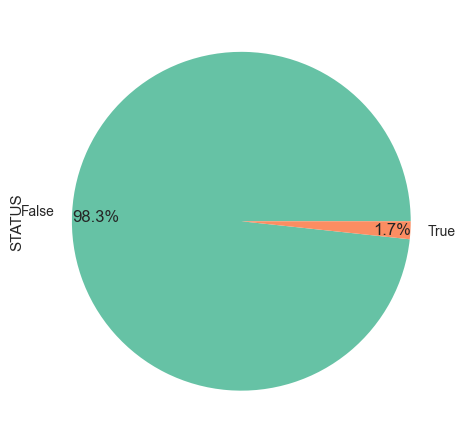

In [88]:
# perbandingan good customer dan bad customer

sns.set_palette('Set2')
data.STATUS.value_counts().plot(kind = 'pie')

cnt = data.STATUS.value_counts(normalize = True)
plt.text(x=0.78, y=-0.08, s=f'{round(cnt[True]*1000)/10}%')
plt.text(x=-1, y=0, s=f'{round(cnt[False],3)*100}%')

False   0.98
True    0.02
Name: STATUS, dtype: float64

In [86]:
# label True merepresentasikan ~1.7% record

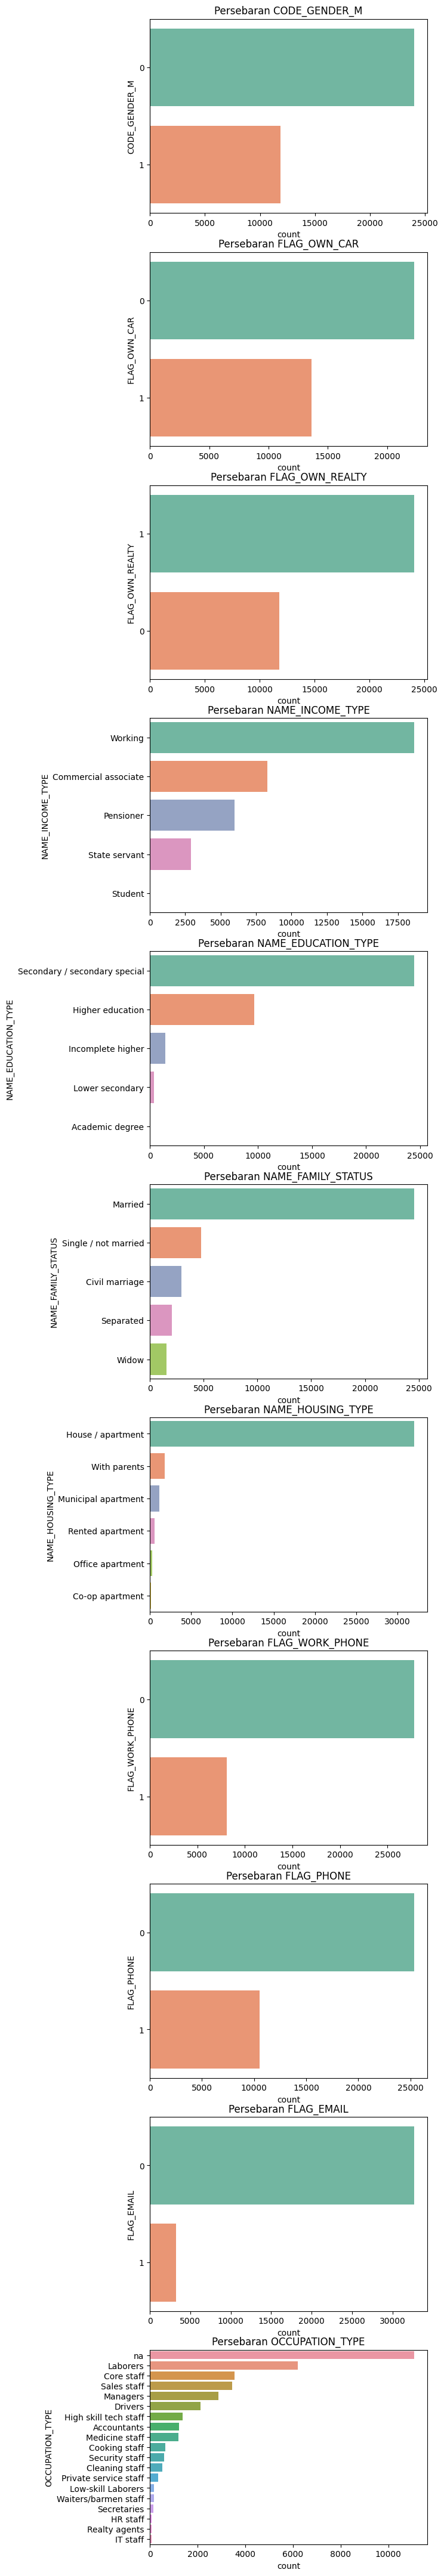

In [30]:
# Persebaran atribut kategorik

fig,ax = plt.subplots(nrows = 11, ncols = 1, figsize = (6,55))
for i,cate in enumerate(cat):
    axis = ax[i]
    sns.countplot(data, y=cate, ax = axis, order = data[cate].value_counts().index)
    axis.set_title(f'Persebaran {cate}')

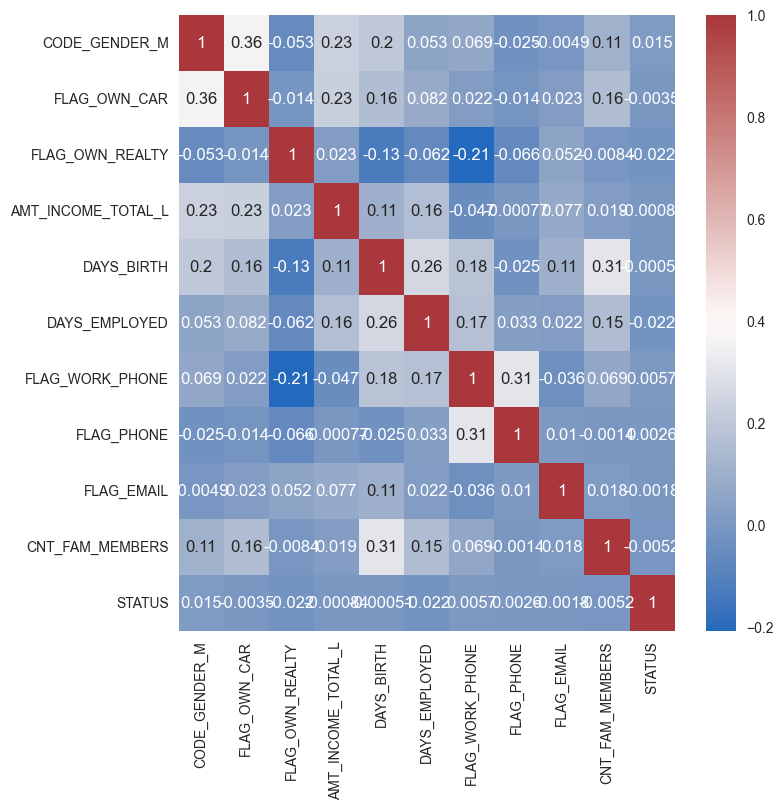

In [69]:
# plot korelasi 
fig,ax = plt.subplots(figsize = (8,8))
sns.heatmap(data.iloc[:,1:].corr(), annot = True, cmap = sns.color_palette('vlag', as_cmap = True))
plt.savefig('corrplot.png')

### B. Modeling and Evaluation

In [52]:
# rasio label True
rasio = data.STATUS.value_counts(normalize = True)[True]
n_true = data.STATUS.value_counts(normalize = False)[True]

rasio

0.016977976024533038

In [56]:
# mengingat ketidakseimbangan label, diperlukan perbaikan imbalance
# menggunakan under-sampling atau over-sampling

x = data_dummy.loc[:, ~data_dummy.columns.isin(['STATUS'])]
y = data_dummy.STATUS

seed = 2230805

from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN(sampling_strategy = 1, random_state = seed)

x_senn, y_senn = smoteenn.fit_resample(x,y)

display(x_senn, y_senn)

ID  CODE_GENDER_M  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      5008804              1             1                1   
1      5008805              1             1                1   
2      5008806              1             1                1   
3      5008808              0             0                1   
4      5008809              0             0                1   
...        ...            ...           ...              ...   
62744  5116549              0             0                1   
62745  5135896              0             0                0   
62746  5143580              1             1                0   
62747  5136501              0             0                0   
62748  5117789              0             1                0   

       AMT_INCOME_TOTAL_L  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  \
0                    5.63      -12005              5                1   
1                    5.63      -12005              5                1   
2                    5.05      -21474              2                0   
3                    5.43      -19110              4                0   
4                    5.43      -19110              4                0   
...                   ...         ...            ...              ...   
62744                5.13      -21312              0                0   
62745                5.02      -19303              1                0   
62746                5.20       -9124              2                1   
62747                5.11      -16758              4                0   
62748                5.21       -9662              2                1   

       FLAG_PHONE  FLAG_EMAIL  ...  OCCUPATION_TYPE_Low-skill Laborers  \
0               0           0  ...                                   0   
1               0           0  ...                                   0   
2               0           0  ...                                   0   
3               1           1  ...                                   0   
4               1           1  ...                                   0   
...           ...         ...  ...                                 ...   
62744           0           0  ...                                   0   
62745           0           0  ...                                   0   
62746           0           0  ...                                   0   
62747           1           0  ...                                   0   
62748           1           0  ...                                   0   

       OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Medicine staff  \
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
...                         ...                             ...   
62744                         0                               0   
62745                         0                               0   
62746                         0                               0   
62747                         0                               0   
62748                         0                               0   

       OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              0   
3                                          0                              0   
4                                          0                              0   
...                                      ...                            ...   
62744                                      0                              0   
62745                                   

0        False
1        False
2        False
3        False
4        False
         ...  
62744     True
62745     True
62746     True
62747     True
62748     True
Name: STATUS, Length: 62749, dtype: bool

In [57]:
data_senn = pd.concat([x_senn, y_senn], axis = 1)
data_senn

ID  CODE_GENDER_M  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      5008804              1             1                1   
1      5008805              1             1                1   
2      5008806              1             1                1   
3      5008808              0             0                1   
4      5008809              0             0                1   
...        ...            ...           ...              ...   
62744  5116549              0             0                1   
62745  5135896              0             0                0   
62746  5143580              1             1                0   
62747  5136501              0             0                0   
62748  5117789              0             1                0   

       AMT_INCOME_TOTAL_L  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  \
0                    5.63      -12005              5                1   
1                    5.63      -12005              5                1   
2                    5.05      -21474              2                0   
3                    5.43      -19110              4                0   
4                    5.43      -19110              4                0   
...                   ...         ...            ...              ...   
62744                5.13      -21312              0                0   
62745                5.02      -19303              1                0   
62746                5.20       -9124              2                1   
62747                5.11      -16758              4                0   
62748                5.21       -9662              2                1   

       FLAG_PHONE  FLAG_EMAIL  ...  OCCUPATION_TYPE_Managers  \
0               0           0  ...                         0   
1               0           0  ...                         0   
2               0           0  ...                         0   
3               1           1  ...                         0   
4               1           1  ...                         0   
...           ...         ...  ...                       ...   
62744           0           0  ...                         0   
62745           0           0  ...                         0   
62746           0           0  ...                         0   
62747           1           0  ...                         0   
62748           1           0  ...                         0   

       OCCUPATION_TYPE_Medicine staff  OCCUPATION_TYPE_Private service staff  \
0                                   0                                      0   
1                                   0                                      0   
2                                   0                                      0   
3                                   0                                      0   
4                                   0                                      0   
...                               ...                                    ...   
62744                               0                                      0   
62745                               0                                      0   
62746                               0                                      0   
62747                               0                                      0   
62748                               0                                      0   

       OCCUPATION_TYPE_Realty agents  OCCUPATION_TYPE_Sales staff  \
0                                  0                            0   
1                                  0                            0   
2                                  0                            0   
3                                  0                            1   
4                                  0                            1   
...                              ...                          ...   
62744                              0                            0   
62745                              0                            0   
62746          

In [58]:
# model setup using pycaret
from pycaret.classification import *

clf = setup(data_senn,
            target = 'STATUS', 
            ignore_features = ['ID'],
            numeric_features = ['AMT_INCOME_TOTAL_L', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']
            )

In [59]:
compare_models()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1079, verbose=0,
                       warm_start=False)

In [60]:
# model terbaik: random forest
mod1 = create_model('dt')

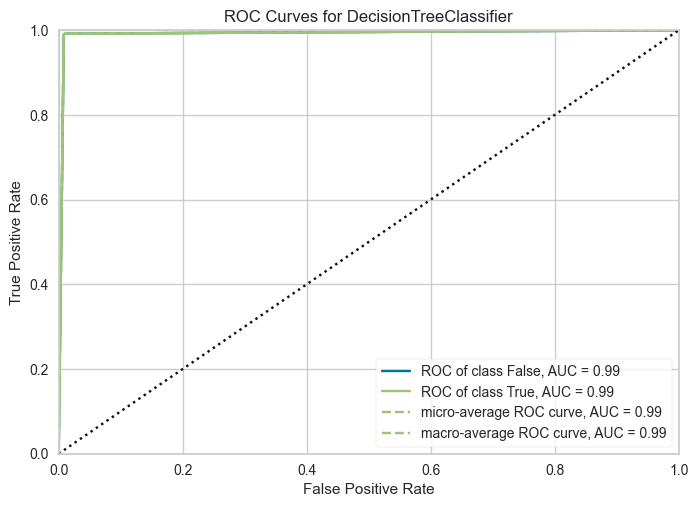

In [61]:
# evaluasi model
# plot roc (receiver operating characteristic)
plot_model(mod1, 'auc')

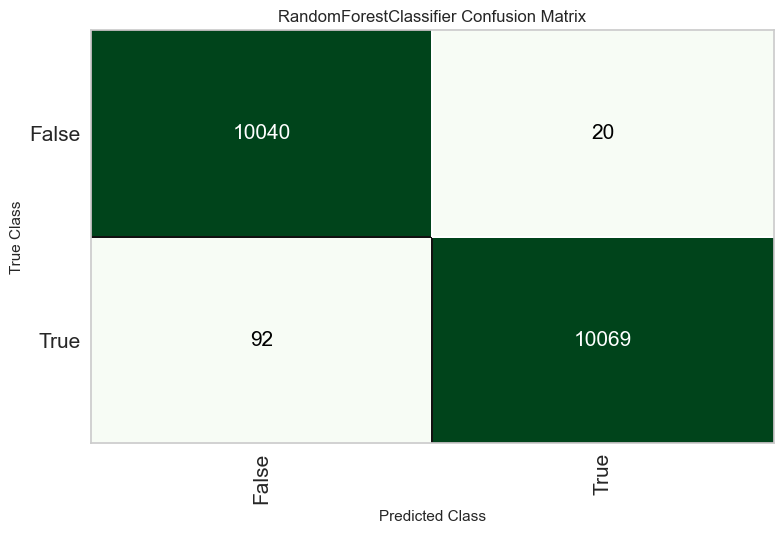

In [69]:
plot_model(mod1, 'confusion_matrix')

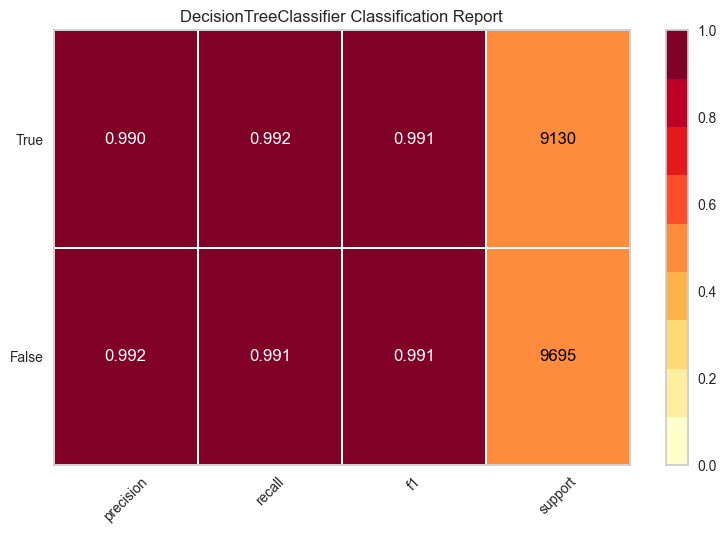

In [62]:
plot_model(mod1, 'class_report')

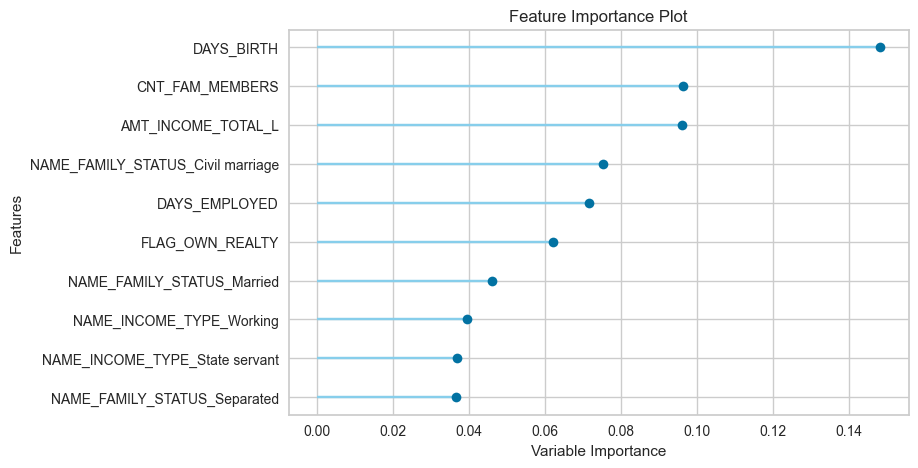

In [63]:
# pengaruh atribut prediktor terhadap STATUS
plot_model(mod1, 'feature')

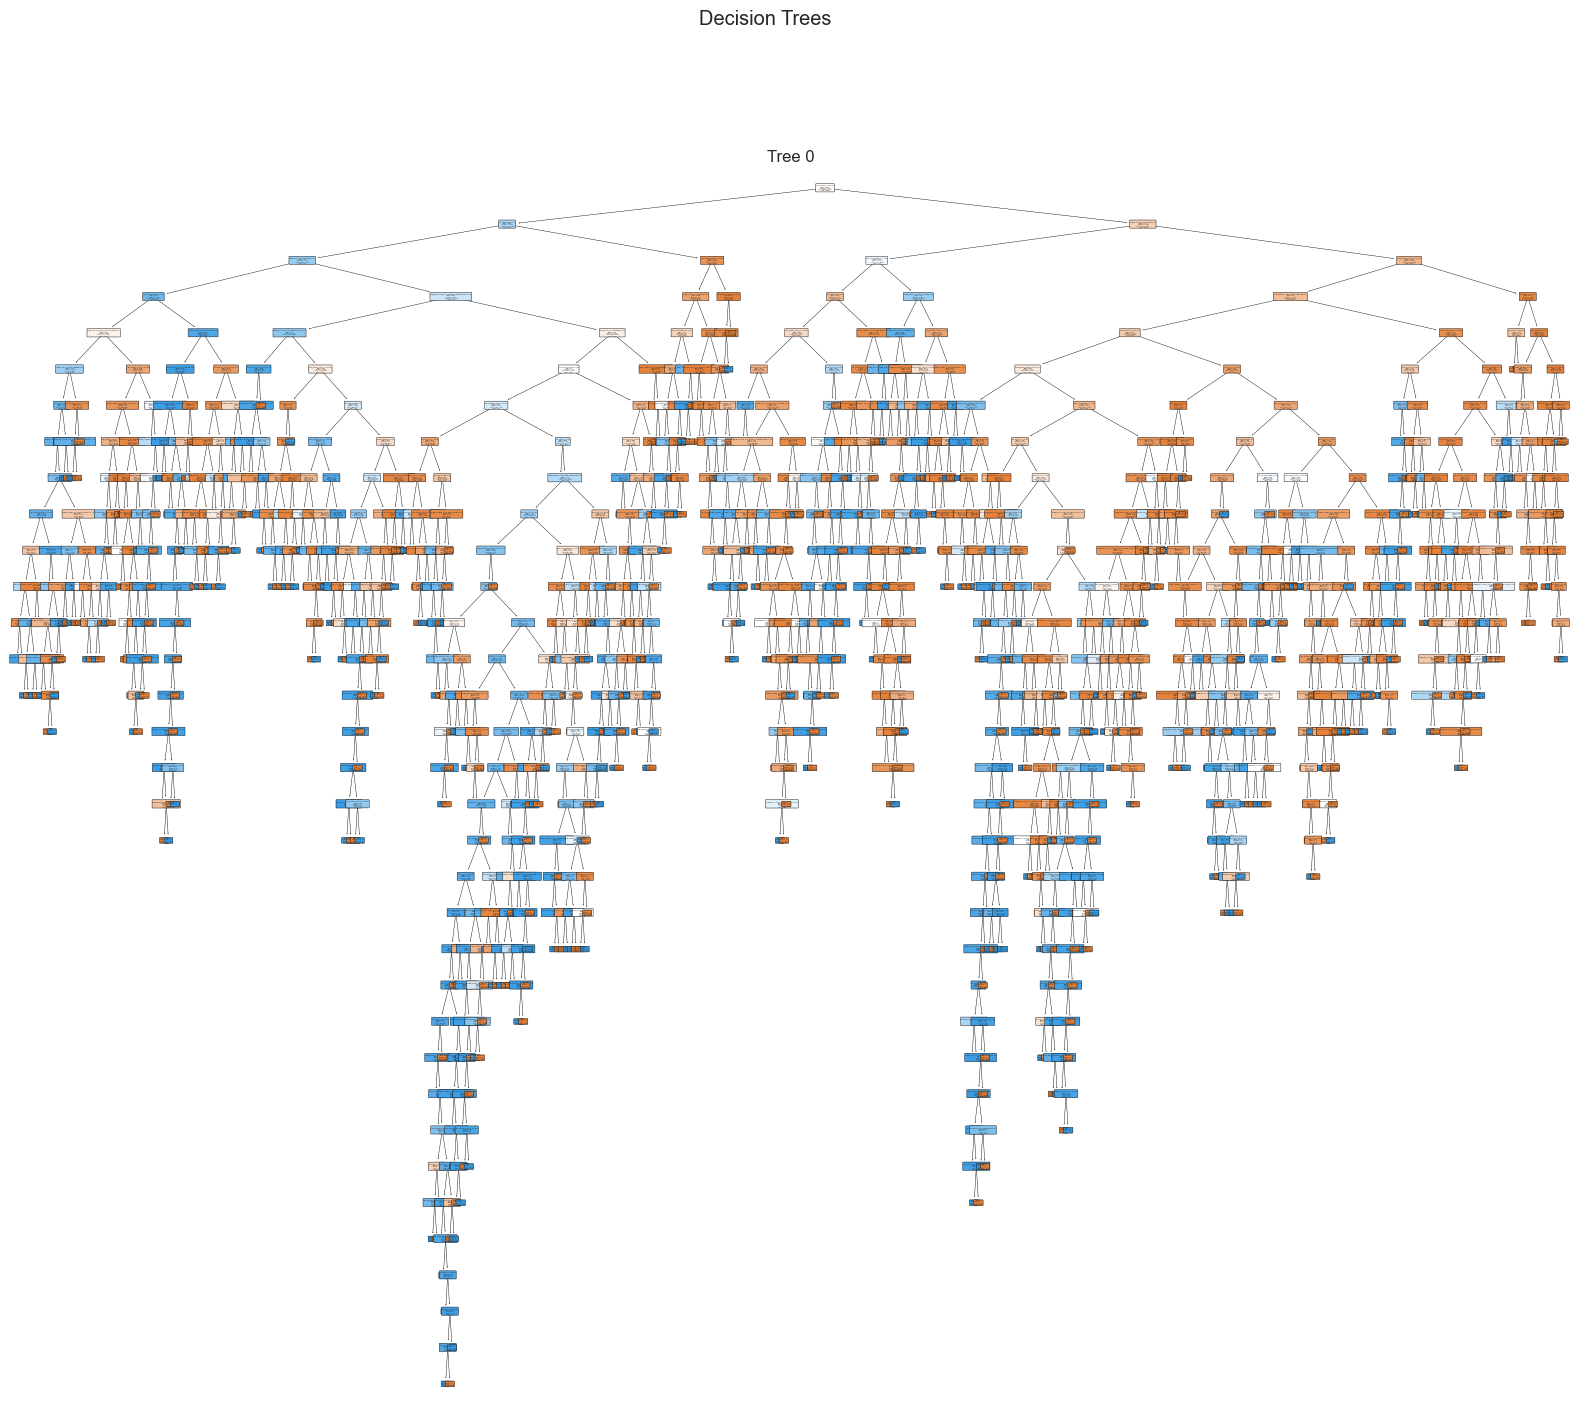

In [65]:
plot_model(mod1, 'tree')

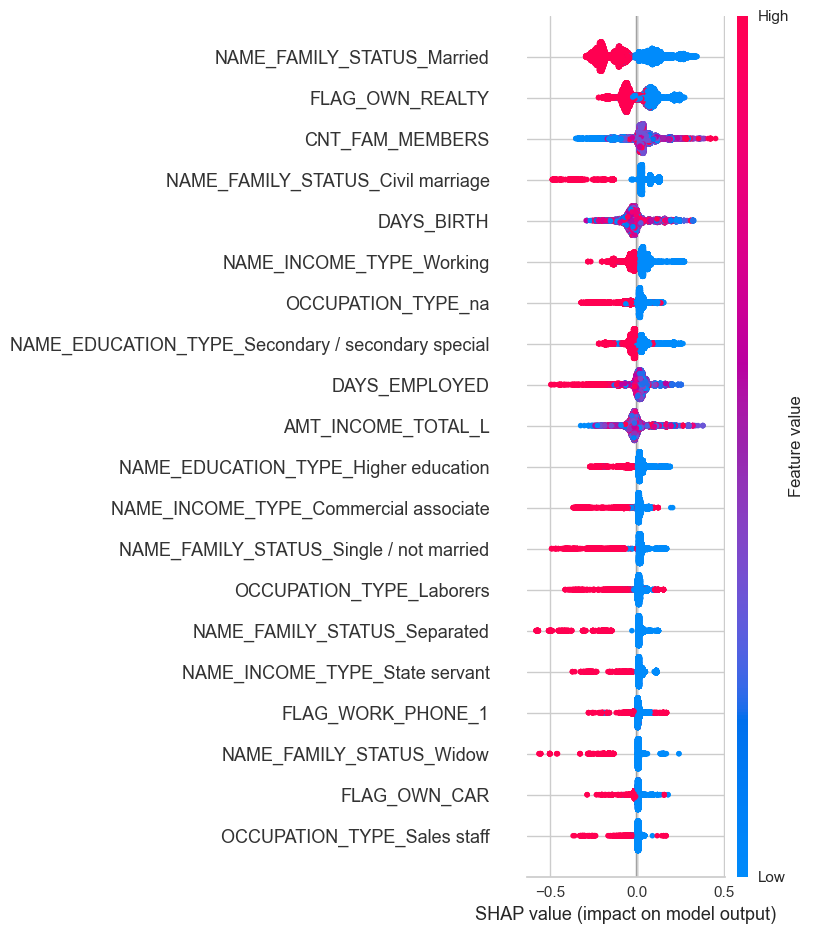

In [66]:
interpret_model(mod1)

## 5. Conclusion and Suggestion

Didapatkan model Decision Tree untuk menglasifikasikan good customer dan bad customer di atas, dengan atribut AMT_INCOME_TOTAL_L, DAYS_BIRTH, DAYS_EMPLOYED, CNT_FAM_MEMBERS, FLAG_OWN_REALTY, NAME_FAMILY_TYPE, dan NAME_INCOME_TYPE meruapakan atribut yang berpengaruh besar. 

In [89]:
mod_final = finalize_model(mod1)

In [111]:
hasil = predict_model(mod_final, data = x)
hasil['true_label'] = y
hasil.Label = (hasil.Label == 'True')
hasil.to_csv('hasil prediksi.csv')

In [112]:
hasil[['Label', 'true_label']]

Label  true_label
0      False       False
1      False       False
2      False       False
3      False       False
4      False       False
...      ...         ...
35865  False        True
35866   True        True
35867   True        True
35868  False        True
35869   True        True

[35870 rows x 2 columns]

In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = hasil.true_label.astype(int), y_pred = hasil.Label.astype(int))

array([[34779,   482],
       [  199,   410]], dtype=int64)

In [100]:
save_model(mod_final, 'model final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['ID'], id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['AMT_INCOME_TOTAL_L',
                                                           'DAYS_BIRTH',
                                                           'DAYS_EMPLOYED',
                                                           'CNT_FAM_MEMBERS'],
                                       target='STATUS', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_availab...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                     